<a href="https://colab.research.google.com/github/bioimagehuji/malaria/blob/main/Crops_to_Excel_no_frames.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @title
from google.colab import files
uploaded = files.upload()

Saving 1001_noegress_spreadsheets.zip to 1001_noegress_spreadsheets.zip


In [ ]:
from logging import warn
import pandas as pd
import zipfile
print("uploaded:", uploaded.keys())
zipname = next(fn for fn in uploaded.keys())
print("zip:", zipname)
archive = zipfile.ZipFile(zipname, 'r')
print("zip contents:", archive.namelist())
numobjects_csv_dfs = {}
volumes_csv_dfs = {}
for csvname in archive.namelist():
  # print(csvname)
  if csvname.endswith('.csv'):
    volumes_csv_dfs[csvname] = pd.read_csv(archive.open(csvname), index_col=False)
  elif csvname.endswith("/"):
    pass
  else:
    warn(f"Unexpected file name: {csvname}")
print("len(volumes_csv_dfs)", len(volumes_csv_dfs))

uploaded: dict_keys(['1001_noegress_spreadsheets.zip'])
zip: 1001_noegress_spreadsheets.zip
zip contents: ['1001_noegress_spreadsheets/M_crop_S1_CROPNUM1_C1_T10_objects.csv', '1001_noegress_spreadsheets/M_crop_S1_CROPNUM1_C1_T11_objects.csv', '1001_noegress_spreadsheets/M_crop_S1_CROPNUM1_C1_T12_objects.csv', '1001_noegress_spreadsheets/M_crop_S1_CROPNUM1_C1_T13_objects.csv', '1001_noegress_spreadsheets/M_crop_S1_CROPNUM1_C1_T14_objects.csv', '1001_noegress_spreadsheets/M_crop_S1_CROPNUM1_C1_T15_objects.csv', '1001_noegress_spreadsheets/M_crop_S1_CROPNUM1_C1_T16_objects.csv', '1001_noegress_spreadsheets/M_crop_S1_CROPNUM1_C1_T17_objects.csv', '1001_noegress_spreadsheets/M_crop_S1_CROPNUM1_C1_T18_objects.csv', '1001_noegress_spreadsheets/M_crop_S1_CROPNUM1_C1_T19_objects.csv', '1001_noegress_spreadsheets/M_crop_S1_CROPNUM1_C1_T2_objects.csv', '1001_noegress_spreadsheets/M_crop_S1_CROPNUM1_C1_T20_objects.csv', '1001_noegress_spreadsheets/M_crop_S1_CROPNUM1_C1_T21_objects.csv', '1001_noeg

In [ ]:
df = pd.concat(volumes_csv_dfs)
df = df.reset_index()
df #.head()

,level_0,level_1,Nb,Name,Label,Type,Vol (unit),Vol (pix),Unnamed: 6
0,1001_noegress_spreadsheets/M_crop_S1_CROPNUM1_...,0,0,C1_T10_obj1-val1,1,0,5.395361,584,NaN
1,1001_noegress_spreadsheets/M_crop_S1_CROPNUM1_...,1,1,C1_T10_obj2-val2,2,0,0.027716,3,NaN
2,1001_noegress_spreadsheets/M_crop_S1_CROPNUM1_...,0,0,C1_T11_obj1-val1,1,0,5.949679,644,NaN
3,1001_noegress_spreadsheets/M_crop_S1_CROPNUM1_...,0,0,C1_T12_obj1-val1,1,0,0.147818,16,NaN
4,1001_noegress_spreadsheets/M_crop_S1_CROPNUM1_...,1,1,C1_T12_obj2-val2,2,0,6.005111,650,NaN
...,...,...,...,...,...,...,...,...,...
250,1001_noegress_spreadsheets/M_crop_S2_CROPNUM1_...,0,0,C2_T2_obj1-val1,1,0,6.374656,690,NaN
251,1001_noegress_spreadsheets/M_crop_S2_CROPNUM1_...,0,0,C2_T3_obj1-val1,1,0,7.603395,823,NaN
252,1001_noegress_spreadsheets/M_crop_S2_CROPNUM1_...,0,0,C2_T4_obj1-val1,1,0,9.072337,982,NaN
253,1001_noegress_spreadsheets/M_crop_S2_CROPNUM1_...,0,0,C2_T5_obj1-val1,1,0,7.797406,844,NaN


In [ ]:
crop_basename = df['level_0'].str.split("/").str[1]
crop_basename

0      M_crop_S1_CROPNUM1_C1_T10_objects.csv
1      M_crop_S1_CROPNUM1_C1_T10_objects.csv
2      M_crop_S1_CROPNUM1_C1_T11_objects.csv
3      M_crop_S1_CROPNUM1_C1_T12_objects.csv
4      M_crop_S1_CROPNUM1_C1_T12_objects.csv
                       ...                  
250     M_crop_S2_CROPNUM1_C2_T2_objects.csv
251     M_crop_S2_CROPNUM1_C2_T3_objects.csv
252     M_crop_S2_CROPNUM1_C2_T4_objects.csv
253     M_crop_S2_CROPNUM1_C2_T5_objects.csv
254     M_crop_S2_CROPNUM1_C2_T6_objects.csv
Name: level_0, Length: 255, dtype: object

In [ ]:
df["slide"] = df['level_0'].str.split("/").str[0].str[:-len("_spreadsheets")]

In [ ]:
df['frame'] = crop_basename.str.split("_").str[5].str[1:].astype(int)
#df[["image", "frame"]].to_numpy()

In [ ]:
df["field"] = crop_basename.str.split("_").str[2].str[1:].astype(int)
#df[["image", "field"]].to_numpy()

In [ ]:
df["crop"] = crop_basename.str.split("_").str[3].str[len("CROPNUM"):].astype(int)
#df[["image", "crop"]].to_numpy()

In [ ]:
# df['level_0'].str.replace(r"_C[0-9]+\.csv", ".csv", regex=True)[0]
df["image"] = df['level_0'].str.replace("_spreadsheets/", "/").str.replace("_crops/M_","_crops/").str.replace(r"_C[0-9]+\.csv", ".tif", regex=True)
df

,level_0,level_1,Nb,Name,Label,Type,Vol (unit),Vol (pix),Unnamed: 6,slide,frame,field,crop,image
0,1001_noegress_spreadsheets/M_crop_S1_CROPNUM1_...,0,0,C1_T10_obj1-val1,1,0,5.395361,584,NaN,1001_noegress,10,1,1,1001_noegress/M_crop_S1_CROPNUM1_C1_T10_object...
1,1001_noegress_spreadsheets/M_crop_S1_CROPNUM1_...,1,1,C1_T10_obj2-val2,2,0,0.027716,3,NaN,1001_noegress,10,1,1,1001_noegress/M_crop_S1_CROPNUM1_C1_T10_object...
2,1001_noegress_spreadsheets/M_crop_S1_CROPNUM1_...,0,0,C1_T11_obj1-val1,1,0,5.949679,644,NaN,1001_noegress,11,1,1,1001_noegress/M_crop_S1_CROPNUM1_C1_T11_object...
3,1001_noegress_spreadsheets/M_crop_S1_CROPNUM1_...,0,0,C1_T12_obj1-val1,1,0,0.147818,16,NaN,1001_noegress,12,1,1,1001_noegress/M_crop_S1_CROPNUM1_C1_T12_object...
4,1001_noegress_spreadsheets/M_crop_S1_CROPNUM1_...,1,1,C1_T12_obj2-val2,2,0,6.005111,650,NaN,1001_noegress,12,1,1,1001_noegress/M_crop_S1_CROPNUM1_C1_T12_object...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,1001_noegress_spreadsheets/M_crop_S2_CROPNUM1_...,0,0,C2_T2_obj1-val1,1,0,6.374656,690,NaN,1001_noegress,2,2,1,1001_noegress/M_crop_S2_CROPNUM1_C2_T2_objects...
251,1001_noegress_spreadsheets/M_crop_S2_CROPNUM1_...,0,0,C2_T3_obj1-val1,1,0,7.603395,823,NaN,1001_noegress,3,2,1,1001_noegress/M_crop_S2_CROPNUM1_C2_T3_objects...
252,1001_noegress_spreadsheets/M_crop_S2_CROPNUM1_...,0,0,C2_T4_obj1-val1,1,0,9.072337,982,NaN,1001_noegress,4,2,1,1001_noegress/M_crop_S2_CROPNUM1_C2_T4_objects...
253,1001_noegress_spreadsheets/M_crop_S2_CROPNUM1_...,0,0,C2_T5_obj1-val1,1,0,7.797406,844,NaN,1001_noegress,5,2,1,1001_noegress/M_crop_S2_CROPNUM1_C2_T5_objects...


In [ ]:
df["channel"] = df['level_0'].str.split("/").str[1].str.split("_").str[4].str[1].astype(int)
df["channel"] = df["channel"].replace({1: "apicoplast", 2: "nucleus"})
# df

In [ ]:
df2 = df[["image", "Label", "Vol (unit)", "Vol (pix)", "frame", "slide", "field", "crop", "channel"]]
df2

,image,Label,Vol (unit),Vol (pix),frame,slide,field,crop,channel
0,1001_noegress/M_crop_S1_CROPNUM1_C1_T10_object...,1,5.395361,584,10,1001_noegress,1,1,apicoplast
1,1001_noegress/M_crop_S1_CROPNUM1_C1_T10_object...,2,0.027716,3,10,1001_noegress,1,1,apicoplast
2,1001_noegress/M_crop_S1_CROPNUM1_C1_T11_object...,1,5.949679,644,11,1001_noegress,1,1,apicoplast
3,1001_noegress/M_crop_S1_CROPNUM1_C1_T12_object...,1,0.147818,16,12,1001_noegress,1,1,apicoplast
4,1001_noegress/M_crop_S1_CROPNUM1_C1_T12_object...,2,6.005111,650,12,1001_noegress,1,1,apicoplast
...,...,...,...,...,...,...,...,...,...
250,1001_noegress/M_crop_S2_CROPNUM1_C2_T2_objects...,1,6.374656,690,2,1001_noegress,2,1,nucleus
251,1001_noegress/M_crop_S2_CROPNUM1_C2_T3_objects...,1,7.603395,823,3,1001_noegress,2,1,nucleus
252,1001_noegress/M_crop_S2_CROPNUM1_C2_T4_objects...,1,9.072337,982,4,1001_noegress,2,1,nucleus
253,1001_noegress/M_crop_S2_CROPNUM1_C2_T5_objects...,1,7.797406,844,5,1001_noegress,2,1,nucleus


<Axes: >

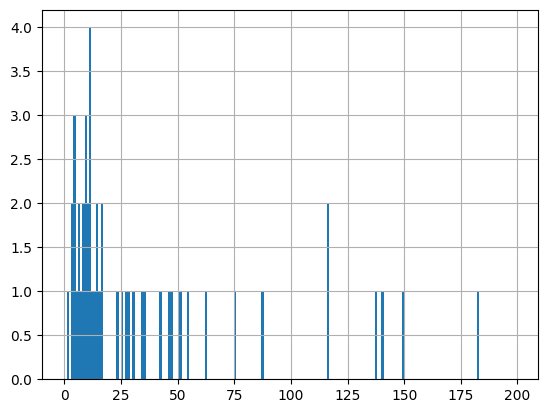

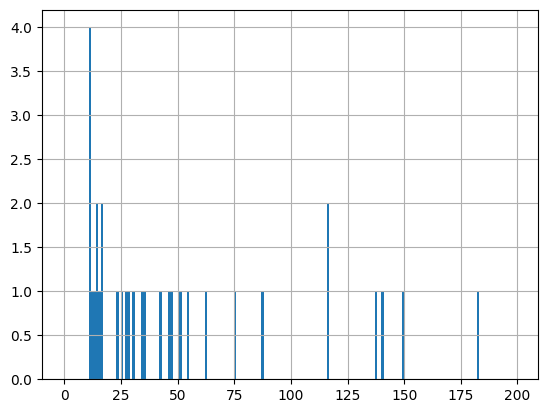

In [ ]:
# Filter out small objects
import numpy as np
df2['Vol (pix)'].hist(bins=np.arange(0,200,1))
df2 = df2[df2['Vol (pix)'] > 10]
from matplotlib import pyplot as plt
plt.figure()
df2['Vol (pix)'].hist(bins=np.arange(0,200,1))

In [ ]:
table = pd.pivot_table(df2, values=['Vol (unit)'], index=['frame'],
                       columns=['channel', 'slide', 'field','crop'],
                       aggfunc=["sum", "count"], fill_value=0)
table = table.rename(columns={'sum': 'volume', 'count': 'objects'})
table.columns = table.columns.set_names('source_value', level=1)  # Name the "Vol (unit)" level
table.columns = table.columns.droplevel(level='source_value')  # Remove the "Vol (unit)" level
table.columns = table.columns.set_names('measurement', level=0)
table.index.name = None  # remove the index name "frame"
new_index = range(1, table.index.max() + 1)
table = table.reindex(new_index, fill_value=0)  # Add rows for missing frames
table.head()

measurement        volume                                                \
channel        apicoplast                            nucleus              
slide       1001_noegress                      1001_noegress              
field                   1                    2             1              
crop                    1          2         1             1          2   
1                0.000000  17.581118  3.760123      0.000000  48.160991   
2                2.974840  17.202334  4.508453      4.360635  42.645527   
3                4.619316  17.562640  5.469270      5.266021  45.980674   
4                3.353624  17.331674  6.162168      4.683987  47.699059   
5                4.083476  15.031255  9.063098      4.489975  49.519070   

measurement                 objects                            
channel                  apicoplast             nucleus        
slide                 1001_noegress       1001_noegress        
field               2             1     2             1     2  
crop                1             1  2  1             1  2  1  
1            4.951907             0  1  1             0  1  1  
2            6.374656             1  1  2             1  1  1  
3            7.603395             1  1  2             1  1  1  
4            9.072337             1  1  1             1  1  1  
5            7.797406             1  1  1             1  1  1

In [ ]:
measurements = table.columns.get_level_values('measurement').unique()
print(measurements)
channels = table.columns.get_level_values('channel').unique()
print(channels)
with pd.ExcelWriter(zipname[:-len(".zip")] + ".xlsx") as writer:
  for measurement in measurements:
    for channel in channels:
      table_measurement_channel = table.filter(like=measurement, axis=1).filter(like=str(channel), axis=1)
      table_measurement_channel.to_excel(writer, sheet_name= channel + "_" + measurement, float_format='%.3f')

Index(['volume', 'objects'], dtype='object', name='measurement')
Index(['apicoplast', 'nucleus'], dtype='object', name='channel')


In [ ]:
table

measurement        volume                                                 \
channel        apicoplast                             nucleus              
slide       1001_noegress                       1001_noegress              
field                   1                     2             1              
crop                    1          2          1             1          2   
1                0.000000  17.581118   3.760123      0.000000  48.160991   
2                2.974840  17.202334   4.508453      4.360635  42.645527   
3                4.619316  17.562640   5.469270      5.266021  45.980674   
4                3.353624  17.331674   6.162168      4.683987  47.699059   
5                4.083476  15.031255   9.063098      4.489975  49.519070   
6                5.062771  15.659482   9.478837      5.672520  51.921114   
7                4.000328  17.673504  10.070109      5.561657  47.403423   
8                5.801861  19.816867  12.324336      6.143691  45.777424   
9                4.591600  19.050060   7.677304      5.506225  43.569391   
10               5.395361  20.999412  11.557529      7.695781  41.305926   
11               5.949679  23.863388  11.151029      8.684315  49.380491   
12               6.152929  28.464227  12.010222      8.287053  46.202401   
13               6.374656  24.962785  11.289609      7.963701  43.523198   
14               6.965929  27.531125  12.823222     11.058643  41.971107   
15               6.577906  23.161252  10.042393      9.257110  45.380163   
16               7.409383  21.932513  12.823222      7.039838  51.006490   
17               5.709475  19.835344  10.541280     10.236405  56.244794   
18               3.649260  19.779912  10.541280     10.282598  53.269955   
19               8.518019  17.876754  11.659154     10.846155  53.750364   
20               7.390906  13.469926  11.751540     12.878654  57.159419   
21               5.007339  14.615517  14.190539     11.215700  56.448044   
22               6.457804  14.088915  12.832460     13.673176  57.103987   
23               5.081248  18.246299  11.141791     16.093698  55.671999   
24               0.000000  17.793606  12.084131     10.929302  60.097304   
25               2.799306  16.694209  10.809200      5.995872  67.007801   
26               1.293409  16.758879  10.568996      9.543507  61.566247   
27               0.000000  18.791378  11.114075      9.571223  63.571030   
28               0.000000  18.791378  11.529813      5.072009  67.580596   
29               0.323352  19.872298  11.271132      2.004783  65.289416   
30               0.000000  18.717469  11.991745      5.312214  56.873021   
31               1.681431  19.364174  14.199778      3.205805  53.399296   
32               2.919408  16.592584  13.553074      6.448565  53.741125   
33               0.572795  17.682743  13.719369      6.189884  43.717209   
34               3.464487  15.317653  14.051960      3.880226  47.181696   
35               3.196567  16.971368  14.744857      5.413839  43.310709   
36               3.279715  17.682743  12.666165      3.057987  49.112570   
37               2.651488  19.244071  13.590028      2.383567  48.955513   
38               0.000000  19.835344  14.412267      6.088259  52.189035   
39               1.265693  17.534924  12.647688      5.229066  55.053011   
40               0.000000  19.789151  15.400800      6.125213  49.047900   
41               0.000000  14.975823  15.677959      5.025816  53.556352   
42               2.891692  11.964029  13.950335      2.605294  55.551897   

measurement                 objects                            
channel                  apicoplast             nucleus        
slide                 1001_noegress       1001_noegress        
field               2             1     2             1     2  
crop                1             1  2  1             1  2  1  
1            4.951907             0  1  1             0  1  1  
2            6.374656             1  1  2  

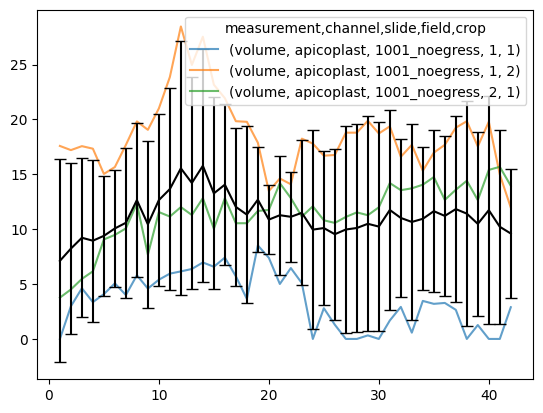

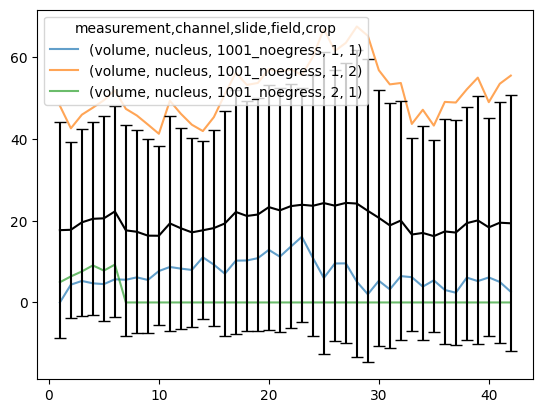

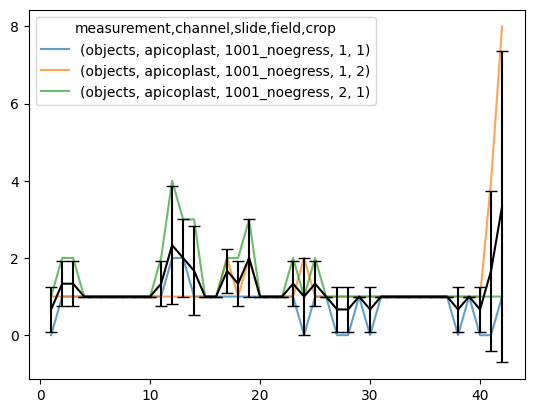

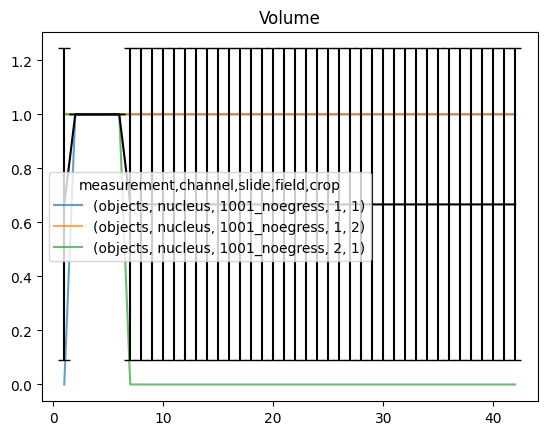

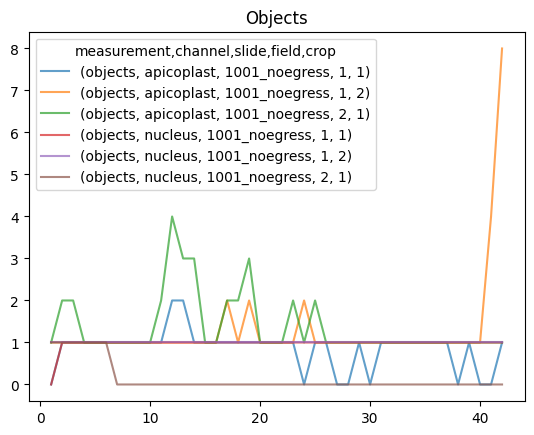

In [ ]:
for measurement in measurements:
  for channel in channels:
    table_measurement_channel = table.filter(like=measurement, axis=1).filter(like=str(channel), axis=1)
    table_measurement_channel.plot(alpha=0.7)
    table_measurement_channel.mean(axis=1).plot(yerr=table_measurement_channel.std(axis=1),
                    color='black',
                    # linewidth=2,
                    # kind='bar',
                    capsize=4)

plt.title('Volume')
plt.show()

# Plot objects in green
table.filter(like='objects', axis=1).plot(alpha=0.7)
plt.title('Objects')
plt.show()


In [ ]:
# prompt: filter and keep only nucleus and volume

table_nucleus_volume = table.filter(like='volume', axis=1).filter(like='nucleus', axis=1)
table_nucleus_volume


measurement        volume                     
channel           nucleus                     
slide       1001_noegress                     
field                   1                    2
crop                    1          2         1
1                0.000000  48.160991  4.951907
2                4.360635  42.645527  6.374656
3                5.266021  45.980674  7.603395
4                4.683987  47.699059  9.072337
5                4.489975  49.519070  7.797406
6                5.672520  51.921114  9.266348
7                5.561657  47.403423  0.000000
8                6.143691  45.777424  0.000000
9                5.506225  43.569391  0.000000
10               7.695781  41.305926  0.000000
11               8.684315  49.380491  0.000000
12               8.287053  46.202401  0.000000
13               7.963701  43.523198  0.000000
14              11.058643  41.971107  0.000000
15               9.257110  45.380163  0.000000
16               7.039838  51.006490  0.000000
17              10.236405  56.244794  0.000000
18              10.282598  53.269955  0.000000
19              10.846155  53.750364  0.000000
20              12.878654  57.159419  0.000000
21              11.215700  56.448044  0.000000
22              13.673176  57.103987  0.000000
23              16.093698  55.671999  0.000000
24              10.929302  60.097304  0.000000
25               5.995872  67.007801  0.000000
26               9.543507  61.566247  0.000000
27               9.571223  63.571030  0.000000
28               5.072009  67.580596  0.000000
29               2.004783  65.289416  0.000000
30               5.312214  56.873021  0.000000
31               3.205805  53.399296  0.000000
32               6.448565  53.741125  0.000000
33               6.189884  43.717209  0.000000
34               3.880226  47.181696  0.000000
35               5.413839  43.310709  0.000000
36               3.057987  49.112570  0.000000
37               2.383567  48.955513  0.000000
38               6.088259  52.189035  0.000000
39               5.229066  55.053011  0.000000
40               6.125213  49.047900  0.000000
41               5.025816  53.556352  0.000000
42               2.605294  55.551897  0.000000